In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

#load the dataset (dataset overview)
data = pd.read_csv("/content/drive/MyDrive/bm/WHR-2024-5CS037.csv")

#1. display the first 10 rows and columns
print("First 10 rows and columns")
print(data.head(10))

First 10 rows and columns
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3             

In [3]:
#2. identify the number of rows and columns
rows, columns = data.shape
print("Number of rows:", rows)
print("Number od columns:", columns)

Number of rows: 143
Number od columns: 9


In [4]:
#3. List the columns and their data types
print("Columns and their data types")
print(data.dtypes)

Columns and their data types
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [5]:
#basic statistics 1. calculate mean, median and standard deviation for the score column
mean_score = data['score'].mean()
median_score = data['score'].median()
standard_deviation = data['score'].std()

print("Mean score is:", mean_score)
print("Median score is:", median_score)
print("Standard deviation is:", standard_deviation)

Mean score is: 5.52758041958042
Median score is: 5.785
Standard deviation is: 1.1707165099442995


In [6]:
#2. country with highest and lowest happiness scores
highest_score = data.loc[data['score'].idxmax()]
lowest_score = data.loc[data['score'].idxmin()]

print("Country with the highest happiness score is:")
print("Country:", highest_score['Country name'], "Score:", highest_score['score'])

print("\nCountry with the lowest happiness score is:")
print("Country:", lowest_score['Country name'], "Score:", lowest_score['score'])


Country with the highest happiness score is:
Country: Finland Score: 7.741

Country with the lowest happiness score is:
Country: Afghanistan Score: 1.721


In [7]:
#check if there are any missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [8]:
# Filter the dataset for countries with a Score greater than 7.5
high_score_countries = data[data['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(high_score_countries)

Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [9]:
# Sort the filtered dataset by GDP per Capita in descending order
sorted_data = high_score_countries.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries by GDP per Capita (Score > 7.5):")
print(sorted_data.head(10))

Top 10 countries by GDP per Capita (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [10]:
import numpy as np

#for categorizing happiness
conditions = [
    (data['score'] < 4),                      # Low
    (data['score'] >= 4) & (data['score'] <= 6),  # Medium
    (data['score'] > 6)                       # High
]

categories = ['Low', 'Medium', 'High']
data['Happiness Category'] = np.select(conditions, categories)
print("Updated dataset with Happiness Category:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))

Updated dataset with Happiness Category:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


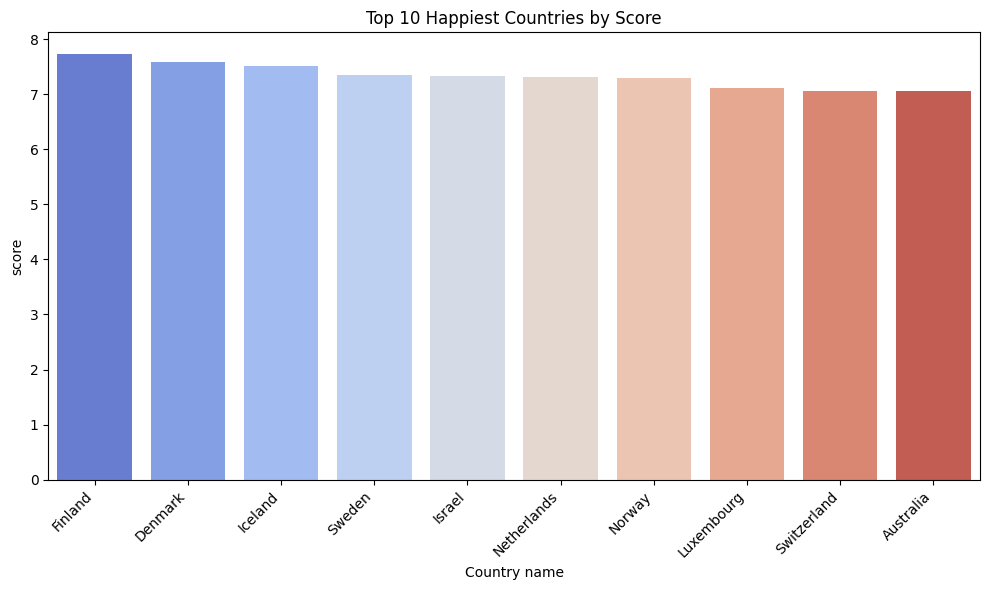

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and filter the top 10 happiest countries
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='coolwarm', hue='Country name', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest Countries by Score')
plt.tight_layout()
plt.show()

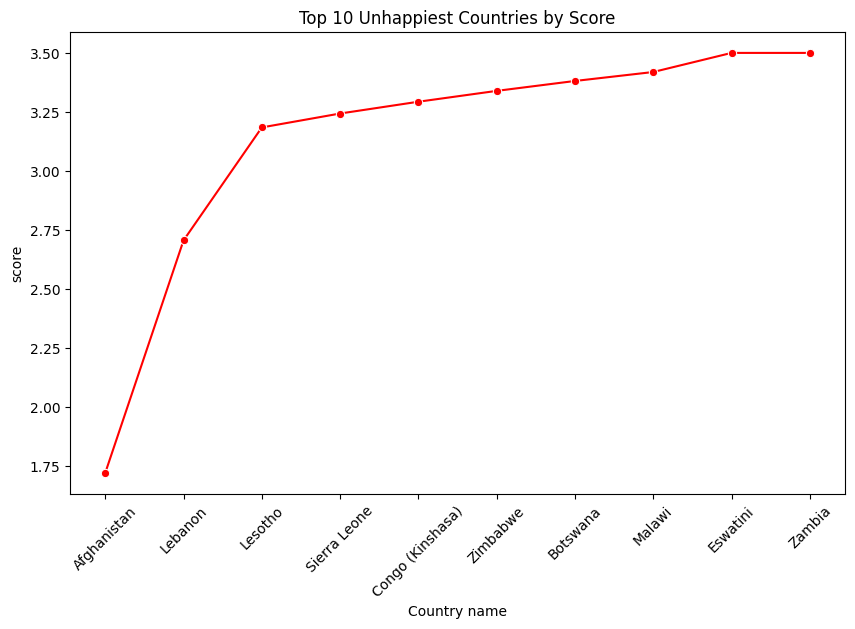

In [12]:
# Sort and filter the top 10 unhappiest countries
top_10_unhappiest = data.sort_values(by='score').head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Top 10 Unhappiest Countries by Score')
plt.show()

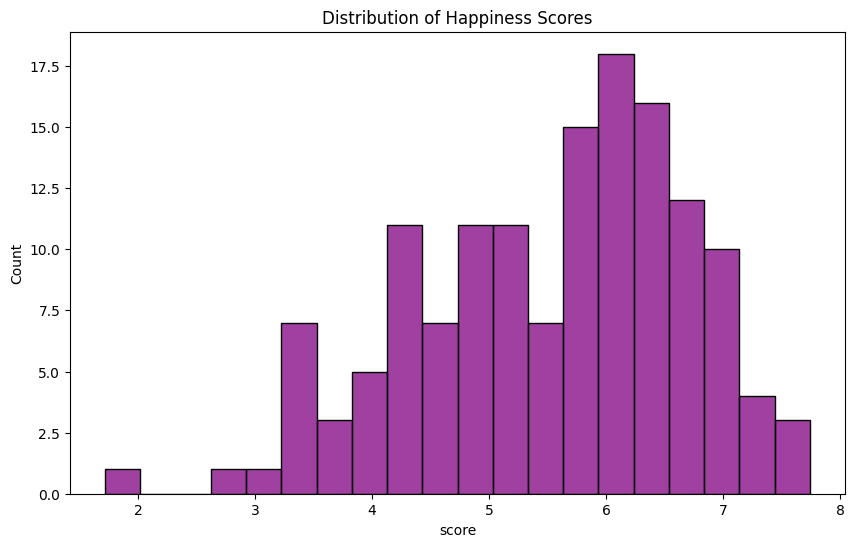

In [13]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, color='purple')
plt.title('Distribution of Happiness Scores')
plt.show()

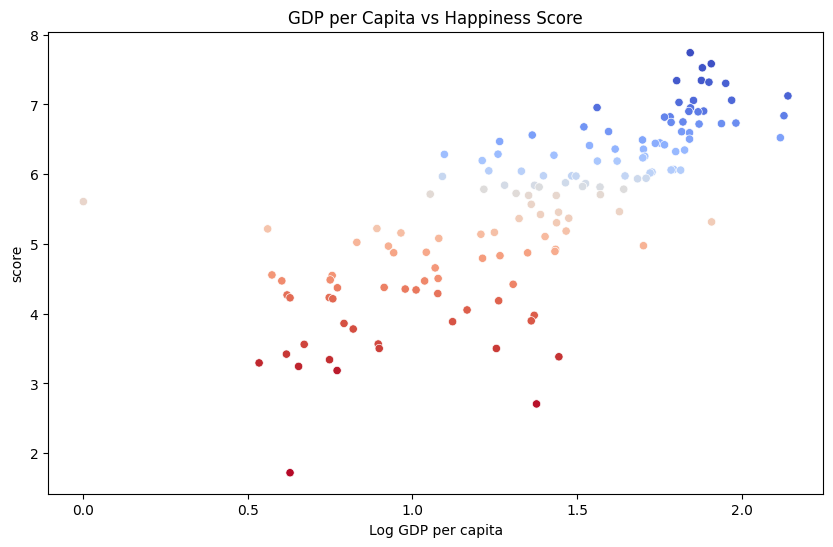

In [14]:
# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Country name', palette='coolwarm', legend=False)
plt.title('GDP per Capita vs Happiness Score')
plt.show()

In [15]:
# Define the countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
print("South Asian Countries:")
print(south_asian_countries)

South Asian Countries:
['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']


In [16]:
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

#Display the filtered dataset
print("Filtered Dataset for South Asian Countries:")
print(south_asia_data)

Filtered Dataset for South Asian Countries:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091

In [20]:
#Save the filtered dataset as a CSV file
output_path = "/content/drive/MyDrive/bm/South_Asia_Dataset.csv"
south_asia_data.to_csv(output_path, index=False)
print(f"Filtered dataset saved to: {output_path}")

Filtered dataset saved to: /content/drive/MyDrive/bm/South_Asia_Dataset.csv


In [21]:
# Create a new column for Composite Score
south_asia_data.loc[:, 'Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

print("South Asia DataFrame with Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

South Asia DataFrame with Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


In [22]:
#Rank the countries based on the Composite Score
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

print("South Asian Countries Ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

South Asian Countries Ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


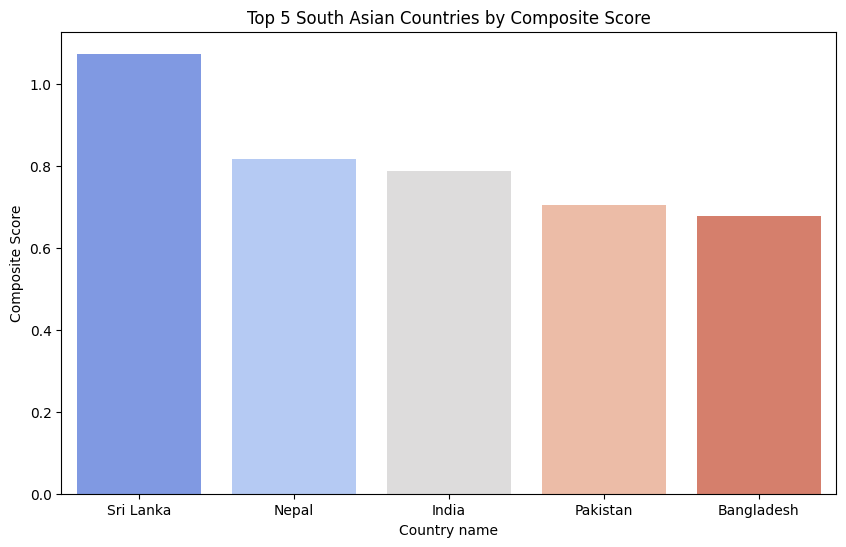

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 5 countries
top_5 = south_asia_data.head(5)

# Create a horizontal bar chart with different colors using Seaborn's palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Composite Score', data=top_5, hue='Country name', palette='coolwarm', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

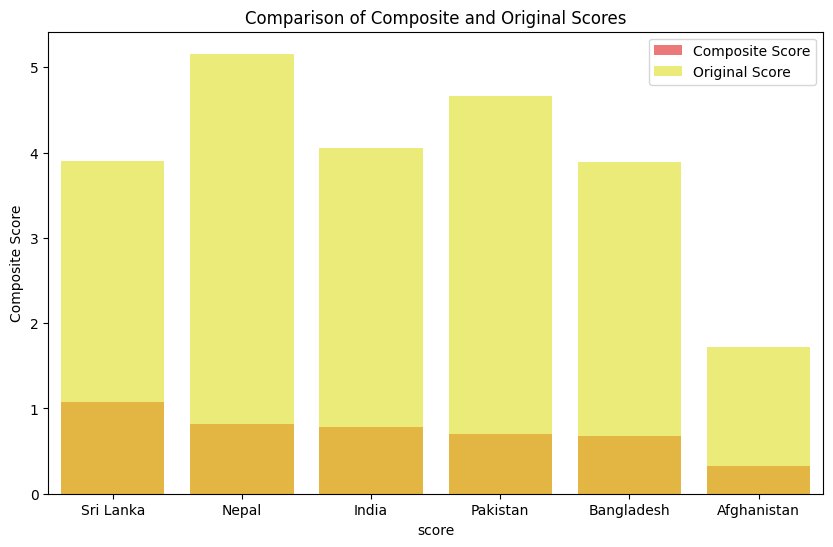

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a comparison plot for Composite Score and Original Score
plt.figure(figsize=(10, 6))

# Plot both Composite Score and Original Score side by side
sns.barplot(y='Composite Score', x='Country name', data=south_asia_data, color='red', label='Composite Score', alpha=0.6)
sns.barplot(y='score', x='Country name', data=south_asia_data, color='yellow', label='Original Score', alpha=0.6)

plt.xlabel('score')
plt.title('Comparison of Composite and Original Scores')
plt.legend()
plt.show()


In [25]:
# Calculate IQR and define outlier bounds
Q1_score, Q3_score = south_asia_data['score'].quantile([0.25, 0.75])
Q1_gdp, Q3_gdp = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_score, IQR_gdp = Q3_score - Q1_score, Q3_gdp - Q1_gdp

# Identify outliers
outliers = south_asia_data[
    (south_asia_data['score'] < Q1_score - 1.5 * IQR_score) |
    (south_asia_data['score'] > Q3_score + 1.5 * IQR_score) |
    (south_asia_data['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) |
    (south_asia_data['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)
]

outliers[['Country name', 'score', 'Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


In [26]:
# Calculate Quartiles and IQR
Q1_score, Q3_score = south_asia_data['score'].quantile([0.25, 0.75])
IQR_score = Q3_score - Q1_score

Q1_gdp, Q3_gdp = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_gdp = Q3_gdp - Q1_gdp

# Define outlier bounds
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

print(f"Lower Bound: {lower_bound_score}, Upper Bound: {upper_bound_score}")
print(f"Lower Bound: {lower_bound_gdp}, Upper Bound: {upper_bound_gdp}")

Lower Bound: 2.963125000000001, Upper Bound: 5.432124999999999
Lower Bound: 0.7449999999999999, Upper Bound: 1.401


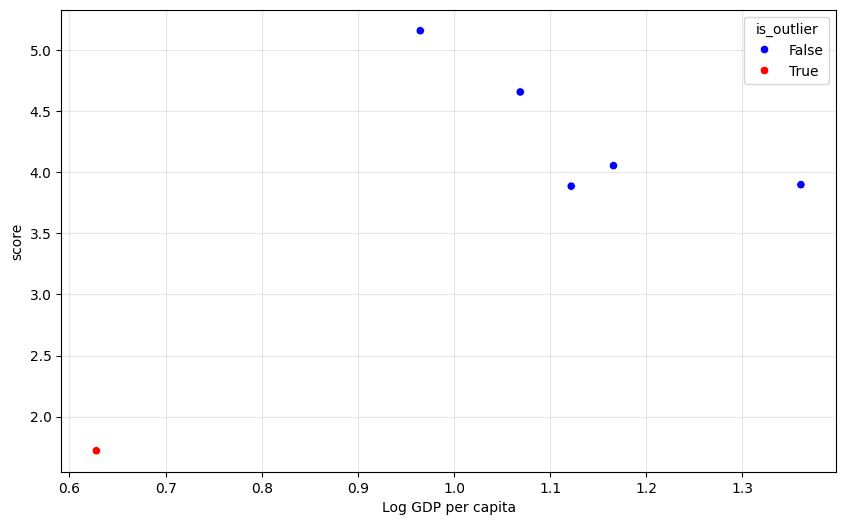

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mark outliers based on the bounds
south_asia_data['is_outlier'] = (
    (south_asia_data['score'] < lower_bound_score) |
    (south_asia_data['score'] > upper_bound_score) |
    (south_asia_data['Log GDP per capita'] < lower_bound_gdp) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp)
)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=south_asia_data,
    hue='is_outlier', palette={False: 'blue', True: 'red'}
)
plt.grid(alpha=0.3)
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.
- Outliers in South Asia, based on happiness score and GDP per capita, show countries with high or low values. These outliers could point to either successful countries or those facing serious issues. They can affect regional averages, so it's important to consider them carefully to avoid the misunderstanding. Understanding outliers helps make better and more accurate.

In [28]:
# Calculate Pearson correlation
correlation_freedom = south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
correlation_generosity = south_asia_data['Generosity'].corr(south_asia_data['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


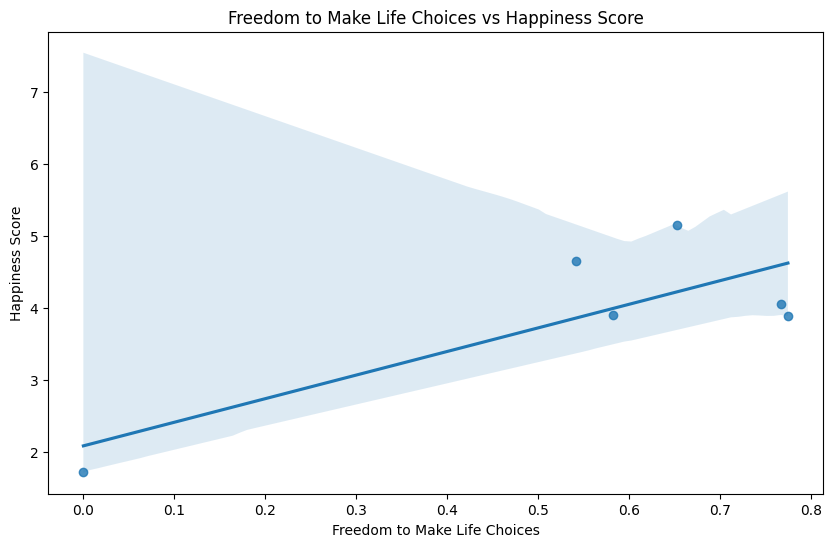

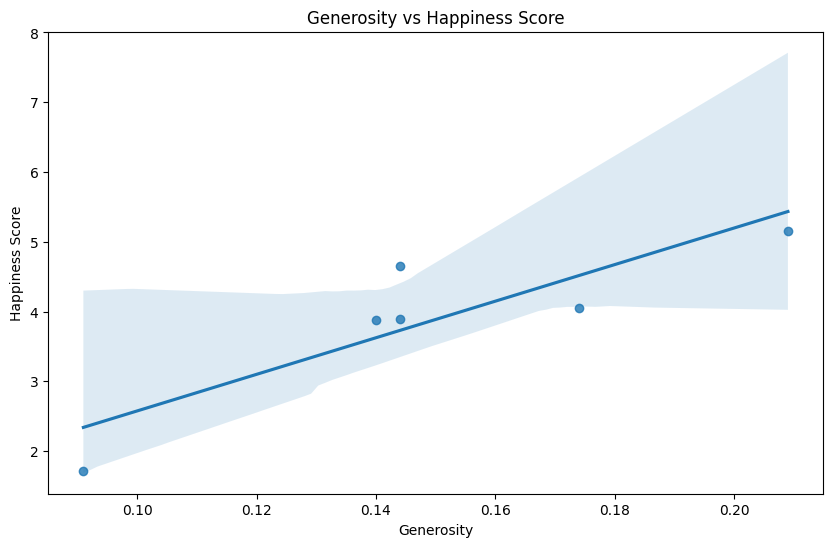

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with trendline for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data)
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_data)
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

3.  Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
- The strongest relationship is the one with the highest correlation to the Score, while the weakest has a correlation closer to zero. For example, if Freedom to Make Life Choices has a higher correlation than Generosity, it suggests freedom is more impactful on happiness.

In [31]:
# Calculate Pearson correlation
correlation_freedom = south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
correlation_generosity = south_asia_data['Generosity'].corr(south_asia_data['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


In [32]:
# Add GDP-Score Gap column
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())

    Country name  Log GDP per capita  score  GDP-Score Gap
127    Sri Lanka               1.361  3.898         -2.537
92         Nepal               0.965  5.158         -4.193
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
128   Bangladesh               1.122  3.886         -2.764


In [33]:
# Rank by GDP-Score Gap in ascending order
ranked_ascending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
print("Ranking by GDP-Score Gap by ascending:")
print(ranked_ascending[['Country name', 'GDP-Score Gap']])

# Rank by GDP-Score Gap in descending order
ranked_descending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
print("Ranking by GDP-Score Gap by descending:")
print(ranked_descending[['Country name', 'GDP-Score Gap']])

Ranking by GDP-Score Gap by ascending:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Ranking by GDP-Score Gap by descending:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


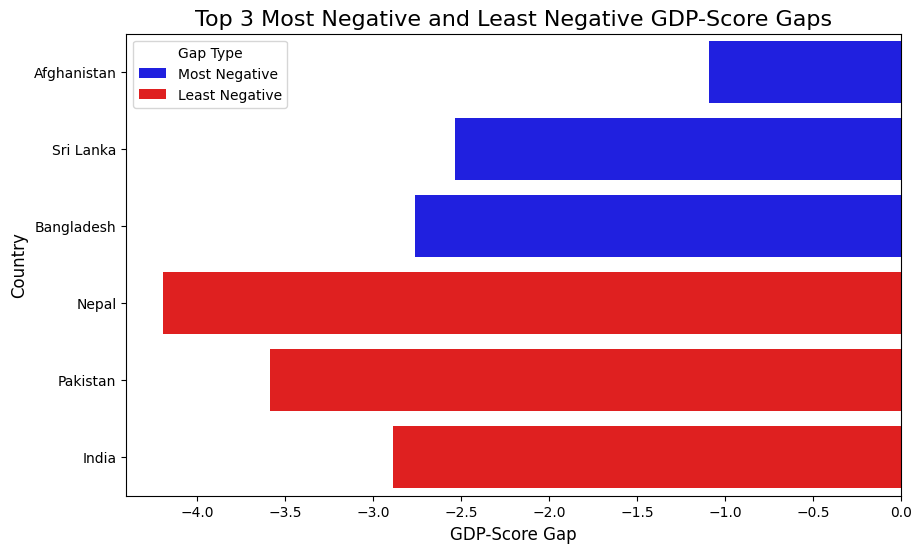

In [34]:
# Get the 3 most negative and 3 least negative values
most_negative_gap = ranked_descending.head(3)
least_negative_gap = ranked_ascending.head(3)

# Combine both groups for visualization
top_gaps = pd.concat([most_negative_gap, least_negative_gap])

# Create a new column to categorize the gaps as 'Most Negative' and 'Least Negative'
top_gaps['Gap Type'] = top_gaps['GDP-Score Gap'].apply(lambda x: 'Most Negative' if x in most_negative_gap['GDP-Score Gap'].values else 'Least Negative')

# Plot a bar chart highlighting the top 3 most negative and least negative GDP-Score gaps
plt.figure(figsize=(10,6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, hue='Gap Type', palette={'Most Negative': 'blue', 'Least Negative': 'red'})

plt.title('Top 3 Most Negative and Least Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('GDP-Score Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.
- Countries with a positive GDP-Score gap may have high economic output but lower happiness, suggesting a need for policies improving well-being. Similarly, a negative gap indicates that non-economic factors like social support may contribute more to happiness than wealth alone.

In [35]:
# List of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print(middle_east_data[['Country name', 'score']])

             Country name  score
4                  Israel  7.341
12                 Kuwait  6.951
21   United Arab Emirates  6.733
27           Saudi Arabia  6.594
61                Bahrain  5.959
91                   Iraq  5.166
99                   Iran  4.923
124                Jordan  4.186
132                 Yemen  3.561
141               Lebanon  2.707


In [ ]:
# Calculate the mean and standard deviation for the score in South Asia
mean_south_asia = south_asia_data['score'].mean()
std_south_asia = south_asia_data['score'].std()

# Calculate the mean and standard deviation for the score in the Middle East
mean_middle_east = middle_east_data['score'].mean()
std_middle_east = middle_east_data['score'].std()

print(f"South Asia - Mean: {mean_south_asia}, Standard Deviation: {std_south_asia}")
print(f"Middle East - Mean: {mean_middle_east}, Standard Deviation: {std_middle_east}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


In [42]:

# Comparison logic from ipython-input-37-4a5dd7644c30
if mean_south_asia > mean_middle_east:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

Middle East has a higher average happiness score.


In [43]:
# Top 3 and Bottom 3 countries for both regions
top_3_south_asia = south_asia_data[['Country name', 'score']].nlargest(3, 'score')
bottom_3_south_asia = south_asia_data[['Country name', 'score']].nsmallest(3, 'score')

top_3_middle_east = middle_east_data[['Country name', 'score']].nlargest(3, 'score')
bottom_3_middle_east = middle_east_data[['Country name', 'score']].nsmallest(3, 'score')

# Print the results
print("South Asia - Top 3:", top_3_south_asia)
print("South Asia - Bottom 3:", bottom_3_south_asia)
print("Middle East - Top 3:", top_3_middle_east)
print("Middle East - Bottom 3:", bottom_3_middle_east)

South Asia - Top 3:     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
South Asia - Bottom 3:     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Middle East - Top 3:             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Middle East - Bottom 3:     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


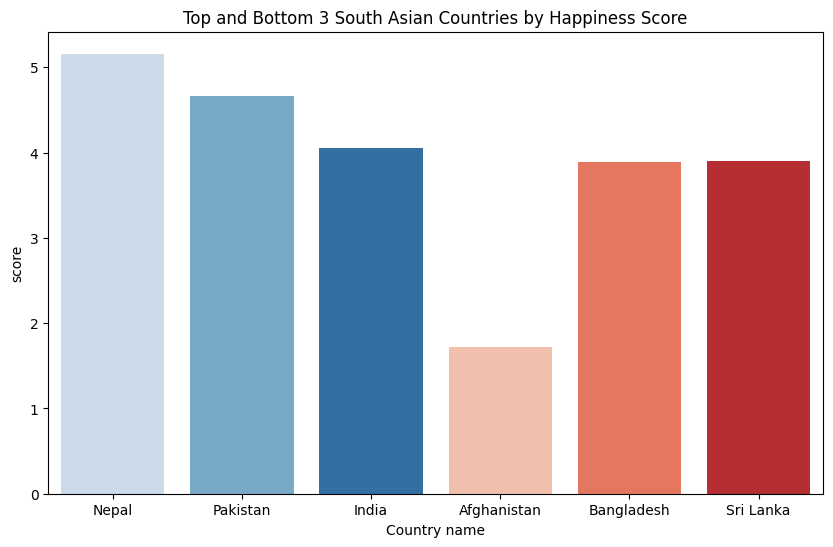

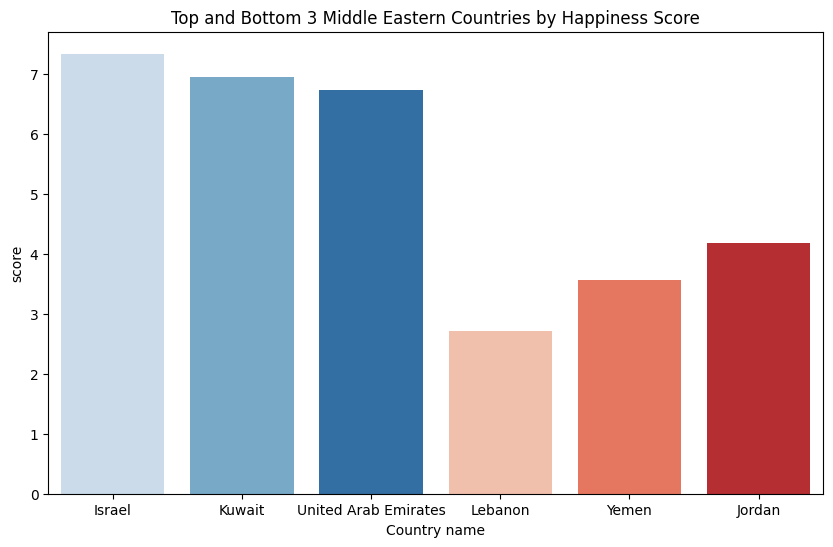

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for South Asia
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=top_3_south_asia, hue='Country name', palette='Blues', legend=False)
sns.barplot(x='Country name', y='score', data=bottom_3_south_asia, hue='Country name', palette='Reds', legend=False)
plt.title('Top and Bottom 3 South Asian Countries by Happiness Score')
plt.show()

# Plot for Middle East
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=top_3_middle_east, hue='Country name', palette='Blues', legend=False)
sns.barplot(x='Country name', y='score', data=bottom_3_middle_east, hue='Country name', palette='Reds', legend=False)
plt.title('Top and Bottom 3 Middle Eastern Countries by Happiness Score')
plt.show()

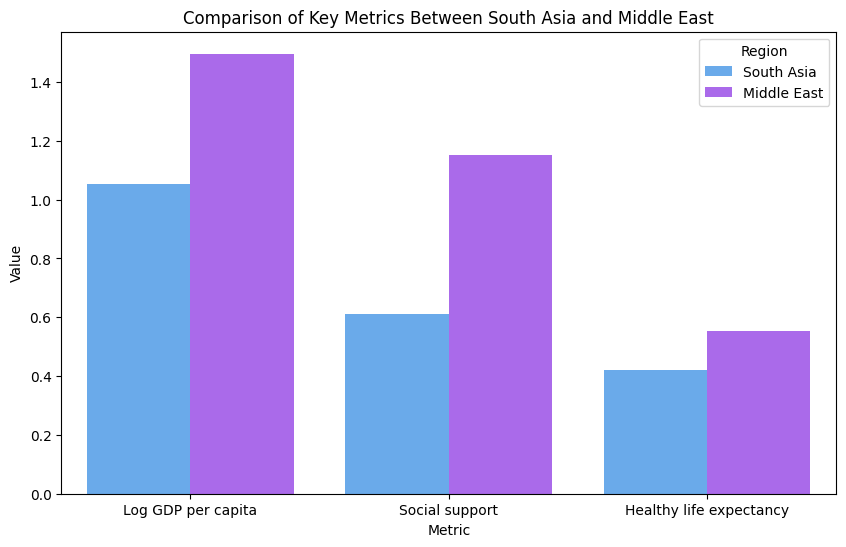

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = south_asia_data[metrics].mean()
middle_east_metrics = middle_east_data[metrics].mean()

#comparison
comparison_data = pd.DataFrame({
    'Metric': metrics * 2,
    'Region': ['South Asia'] * len(metrics) + ['Middle East'] * len(metrics),
    'Value': list(south_asia_metrics) + list(middle_east_metrics)
})

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_data, palette='cool')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.show()

In [46]:
disparity = south_asia_metrics - middle_east_metrics
disparity_data = pd.DataFrame({
    'Metric': metrics,
    'Disparity': disparity
})
# Sort the disparity values in descending order to find the largest disparities
disparity_data = disparity_data.sort_values(by='Disparity', ascending=False)
print(disparity_data)

                                          Metric  Disparity
Healthy life expectancy  Healthy life expectancy  -0.133778
Log GDP per capita            Log GDP per capita  -0.444500
Social support                    Social support  -0.540944


In [47]:
# Calculate the range for Score in both regions
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

# Calculate the coefficient of variation for Score in both regions
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}")

South Asia - Range: 3.4370000000000003, CV: 0.30214828833374263
Middle East - Range: 4.634, CV: 0.28938880812119405


In [48]:
# Compare CV values
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia has greater variability in happiness.


In [49]:
# Calculate the Pearson correlation for Score with Freedom and Generosity for both regions
south_asia_corr = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr().iloc[0, 1:3]
middle_east_corr = middle_east_data[['score', 'Freedom to make life choices', 'Generosity']].corr().iloc[0, 1:3]

print("South Asia correlations:")
print(south_asia_corr)

print("\nMiddle East correlations:")
print(middle_east_corr)

South Asia correlations:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East correlations:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


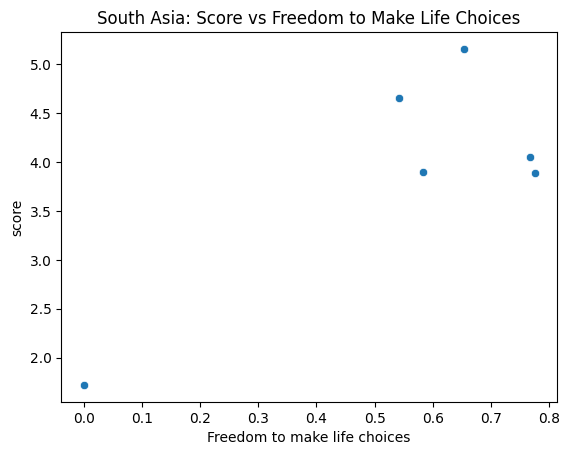

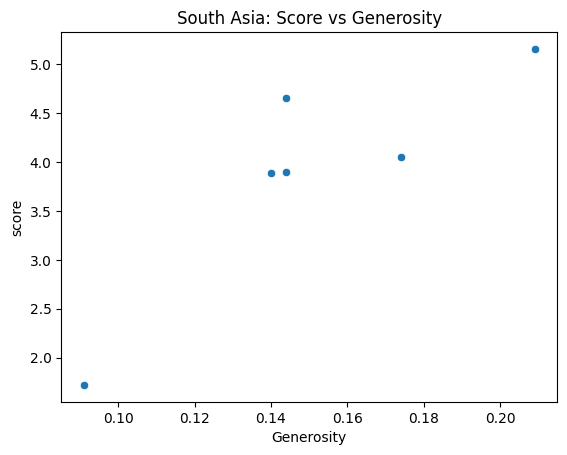

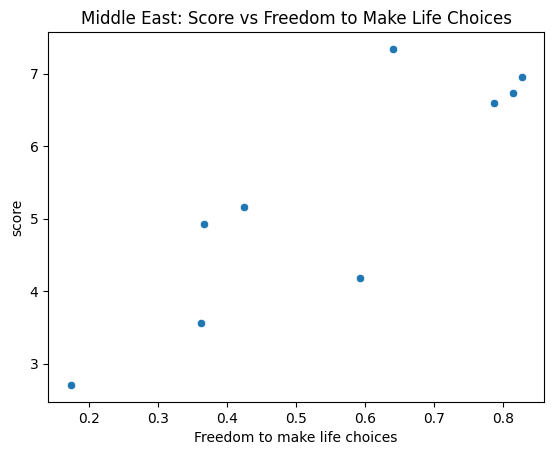

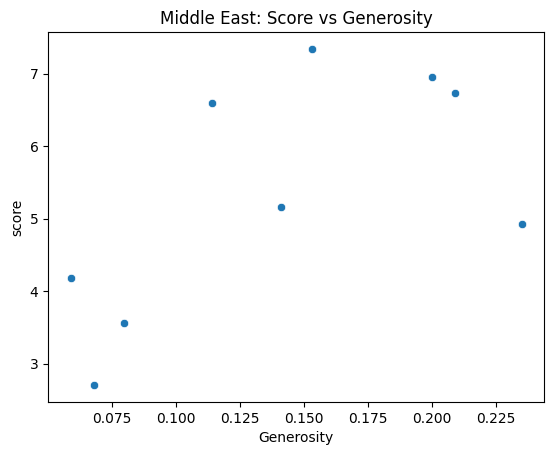

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for South Asia
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_data)
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.show()

sns.scatterplot(x='Generosity', y='score', data=south_asia_data)
plt.title('South Asia: Score vs Generosity')
plt.show()

# Scatter plot for Middle East
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_data)
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.show()

sns.scatterplot(x='Generosity', y='score', data=middle_east_data)
plt.title('Middle East: Score vs Generosity')
plt.show()

In [52]:
# Calculate IQR and outlier bounds for South Asia
Q1_score_sa, Q3_score_sa = south_asia_data['score'].quantile([0.25, 0.75])
Q1_gdp_sa, Q3_gdp_sa = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_score_sa = Q3_score_sa - Q1_score_sa
IQR_gdp_sa = Q3_gdp_sa - Q1_gdp_sa

lower_bound_score_sa = Q1_score_sa - 1.5 * IQR_score_sa
upper_bound_score_sa = Q3_score_sa + 1.5 * IQR_score_sa
lower_bound_gdp_sa = Q1_gdp_sa - 1.5 * IQR_gdp_sa
upper_bound_gdp_sa = Q3_gdp_sa + 1.5 * IQR_gdp_sa

# Identify outliers for South Asia
outliers_sa = south_asia_data[
    (south_asia_data['score'] < lower_bound_score_sa) |
    (south_asia_data['score'] > upper_bound_score_sa) |
    (south_asia_data['Log GDP per capita'] < lower_bound_gdp_sa) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp_sa)
]
print("Outliers in South Asia:")
print(outliers_sa[['Country name', 'score', 'Log GDP per capita']])


# Calculate IQR and outlier bounds for Middle East
Q1_score_me, Q3_score_me = middle_east_data['score'].quantile([0.25, 0.75])
Q1_gdp_me, Q3_gdp_me = middle_east_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_score_me = Q3_score_me - Q1_score_me
IQR_gdp_me = Q3_gdp_me - Q1_gdp_me

lower_bound_score_me = Q1_score_me - 1.5 * IQR_score_me
upper_bound_score_me = Q3_score_me + 1.5 * IQR_score_me
lower_bound_gdp_me = Q1_gdp_me - 1.5 * IQR_gdp_me
upper_bound_gdp_me = Q3_gdp_me + 1.5 * IQR_gdp_me

# Identify outliers for Middle East
outliers_me = middle_east_data[
    (middle_east_data['score'] < lower_bound_score_me) |
    (middle_east_data['score'] > upper_bound_score_me) |
    (middle_east_data['Log GDP per capita'] < lower_bound_gdp_me) |
    (middle_east_data['Log GDP per capita'] > upper_bound_gdp_me)
]
print("Outliers in Middle East:")
print(outliers_me[['Country name', 'score', 'Log GDP per capita']])

Outliers in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628
Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


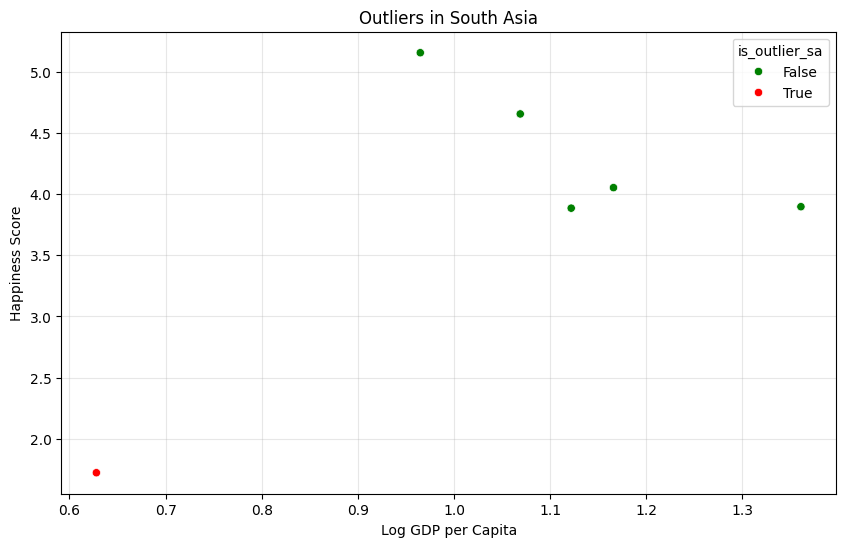

In [56]:
# Calculate IQR and outlier bounds for South Asia
Q1_score_sa, Q3_score_sa = south_asia_data['score'].quantile([0.25, 0.75])
Q1_gdp_sa, Q3_gdp_sa = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_score_sa = Q3_score_sa - Q1_score_sa
IQR_gdp_sa = Q3_gdp_sa - Q1_gdp_sa

lower_bound_score_sa = Q1_score_sa - 1.5 * IQR_score_sa
upper_bound_score_sa = Q3_score_sa + 1.5 * IQR_score_sa
lower_bound_gdp_sa = Q1_gdp_sa - 1.5 * IQR_gdp_sa
upper_bound_gdp_sa = Q3_gdp_sa + 1.5 * IQR_gdp_sa

# Identify outliers for South Asia and assign to 'is_outlier_sa' column within the DataFrame
south_asia_data['is_outlier_sa'] = (
    (south_asia_data['score'] < lower_bound_score_sa) |
    (south_asia_data['score'] > upper_bound_score_sa) |
    (south_asia_data['Log GDP per capita'] < lower_bound_gdp_sa) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp_sa)
)


# ... (rest of your code for Middle East calculations and plotting)

# Plot for South Asia using the 'is_outlier_sa' column for hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', hue='is_outlier_sa', data=south_asia_data, palette={False: 'green', True: 'red'})
plt.title('Outliers in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(alpha=0.3)
plt.show()

Outliers in both regions may indicate countries with unique economic or social conditions that deviate significantly from regional trends, potentially affecting regional averages and policy focus.








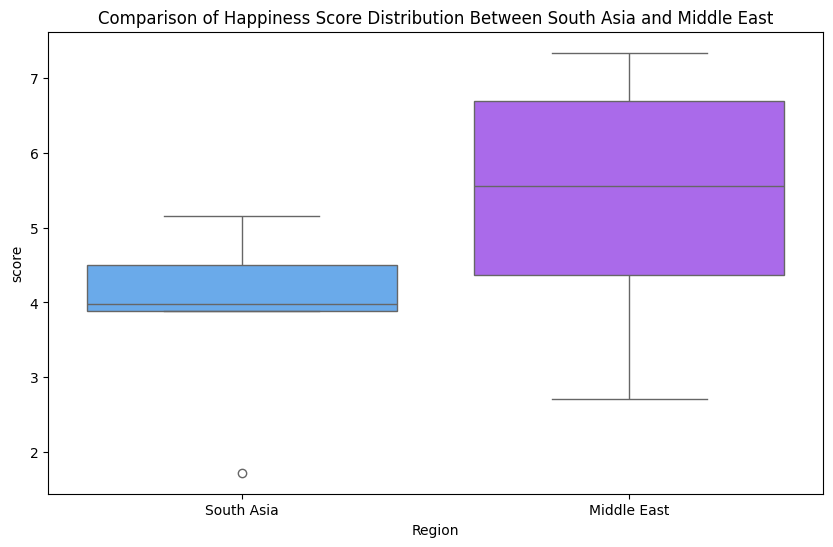

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid SettingWithCopyWarning by using .loc
south_asia_data.loc[:, 'Region'] = 'South Asia'
middle_east_data.loc[:, 'Region'] = 'Middle East'

# Combine both datasets
combined_data = pd.concat([south_asia_data[['score', 'Region']], middle_east_data[['score', 'Region']]])

# Create boxplot with the correct hue setting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='cool', hue='Region')
plt.title('Comparison of Happiness Score Distribution Between South Asia and Middle East')
plt.show()

2. Interpret the key differences in distribution shapes, medians, and outliers
- South Asia: Wider spread, more variability, and more outliers.
- Middle East: Narrower distribution, higher median, fewer extreme outliers.







In [60]:
# Check basic statistics for both regions to compare medians, range, and outliers
south_asia_stats = south_asia_data['score'].describe()
middle_east_stats = middle_east_data['score'].describe()

print("South Asia Statistics:", south_asia_stats)
print("\nMiddle East Statistics:", middle_east_stats)

South Asia Statistics: count    6.000000
mean     3.895667
std      1.177069
min      1.721000
25%      3.889000
50%      3.976000
75%      4.506250
max      5.158000
Name: score, dtype: float64

Middle East Statistics: count    10.000000
mean      5.412100
std       1.566201
min       2.707000
25%       4.370250
50%       5.562500
75%       6.698250
max       7.341000
Name: score, dtype: float64
